In [1]:
import keras
import tensorflow as tf
from keras import backend as K
import sys
import sklearn as sk
import pandas as pd
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


[]

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)


2113536/2110848 [==============================] - 5s 2us/step


In [3]:
len(train_data)

8982

In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

557056/550378 [==============================] - 1s 2us/step


In [5]:
#  transforma as sequencias de integers em vetores de 0s, com 1s onde a
#  palavra representada pelo integer está presente

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
#  transforma as labels em vetores de 0s, 
#  com 1s na posição onde a label é a correta

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [8]:
#  versão alternativa do codigo acima

from keras.utils.np_utils import to_categorical


one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [9]:
#  construindo a rede neural

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [10]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [11]:
#separando valores de treinamento para validação

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [12]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 321us/step - loss: 2.5322 - acc: 0.4955 - val_loss: 1.7207 - val_acc: 0.6130
Epoch 2/20
7982/7982 [==============================] - 1s 156us/step - loss: 1.4452 - acc: 0.6879 - val_loss: 1.3455 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 1s 154us/step - loss: 1.0951 - acc: 0.7651 - val_loss: 1.1710 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 152us/step - loss: 0.8696 - acc: 0.8158 - val_loss: 1.0790 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 154us/step - loss: 0.7031 - acc: 0.8473 - val_loss: 0.9847 - val_acc: 0.7840
Epoch 6/20
7982/7982 [==============================] - 1s 155us/step - loss: 0.5662 - acc: 0.8796 - val_loss: 0.9417 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 153us/step - loss: 0.4580 - acc: 0.9053 - val_loss: 0.9079 - val_acc: 0.8010


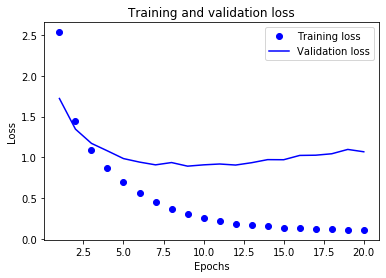

In [14]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

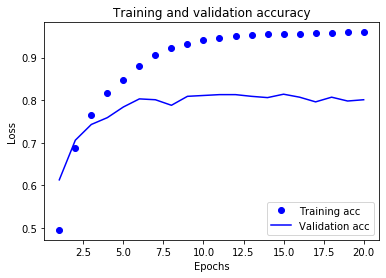

In [15]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
#  Second test with 9 epochs

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 220us/step - loss: 2.5353 - acc: 0.5244 - val_loss: 1.6782 - val_acc: 0.6550
Epoch 2/9
7982/7982 [==============================] - 1s 160us/step - loss: 1.3682 - acc: 0.7136 - val_loss: 1.2725 - val_acc: 0.7230
Epoch 3/9
7982/7982 [==============================] - 1s 155us/step - loss: 1.0101 - acc: 0.7808 - val_loss: 1.1310 - val_acc: 0.7500
Epoch 4/9
7982/7982 [==============================] - 1s 155us/step - loss: 0.7957 - acc: 0.8254 - val_loss: 1.0530 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 155us/step - loss: 0.6387 - acc: 0.8631 - val_loss: 0.9733 - val_acc: 0.7950
Epoch 6/9
7982/7982 [==============================] - 1s 157us/step - loss: 0.5116 - acc: 0.8926 - val_loss: 0.9090 - val_acc: 0.8100
Epoch 7/9
7982/7982 [==============================] - 1s 156us/step - loss: 0.4122 - acc: 0.9141 - val_loss: 0.8934 - val_acc: 0.8220
Epoch 8

In [17]:
results

[1.0209990643223588, 0.7760463045944832]

In [38]:
#  faz previsoes baseado no modelo previamente criado

predictions = model.predict(x_test)

In [39]:
predictions

array([[1.47053424e-05, 9.97555253e-05, 6.16895995e-05, ...,
        2.42872666e-05, 2.20711208e-05, 2.02268075e-05],
       [1.25925681e-02, 2.11230457e-01, 7.20775314e-03, ...,
        6.63289218e-04, 3.73030070e-06, 7.96295444e-06],
       [3.30917239e-02, 5.98540485e-01, 6.44470286e-03, ...,
        1.14141754e-03, 5.48005773e-05, 2.23239578e-04],
       ...,
       [8.68963543e-05, 6.91383320e-04, 8.30417121e-05, ...,
        5.16166801e-05, 2.44171297e-05, 8.45980394e-05],
       [3.77940875e-03, 1.10003896e-01, 4.54882067e-03, ...,
        1.07541017e-03, 1.33655057e-03, 2.19321740e-03],
       [2.89666560e-03, 6.47965014e-01, 1.06718745e-02, ...,
        3.25286499e-04, 1.45233898e-05, 2.39937108e-05]], dtype=float32)

In [40]:
for prediction in predictions:
    print('the predicition is: ', np.where(prediction == max(prediction)) , ' -> ' , max(prediction))

the predicition is:  (array([3], dtype=int64),)  ->  0.8967281
the predicition is:  (array([10], dtype=int64),)  ->  0.24048705
the predicition is:  (array([1], dtype=int64),)  ->  0.5985405
the predicition is:  (array([4], dtype=int64),)  ->  0.7878183
the predicition is:  (array([13], dtype=int64),)  ->  0.9648574
the predicition is:  (array([3], dtype=int64),)  ->  0.977258
the predicition is:  (array([3], dtype=int64),)  ->  0.91756904
the predicition is:  (array([3], dtype=int64),)  ->  0.9946779
the predicition is:  (array([3], dtype=int64),)  ->  0.9973929
the predicition is:  (array([3], dtype=int64),)  ->  0.8843611
the predicition is:  (array([1], dtype=int64),)  ->  0.70965034
the predicition is:  (array([4], dtype=int64),)  ->  0.9932166
the predicition is:  (array([1], dtype=int64),)  ->  0.9734431
the predicition is:  (array([3], dtype=int64),)  ->  0.9871661
the predicition is:  (array([1], dtype=int64),)  ->  0.75602174
the predicition is:  (array([11], dtype=int64),)  

the predicition is:  (array([3], dtype=int64),)  ->  0.93724984
the predicition is:  (array([19], dtype=int64),)  ->  0.83769405
the predicition is:  (array([43], dtype=int64),)  ->  0.19088219
the predicition is:  (array([3], dtype=int64),)  ->  0.9714405
the predicition is:  (array([9], dtype=int64),)  ->  0.9579318
the predicition is:  (array([3], dtype=int64),)  ->  0.99980575
the predicition is:  (array([4], dtype=int64),)  ->  0.9862853
the predicition is:  (array([4], dtype=int64),)  ->  0.95958483
the predicition is:  (array([10], dtype=int64),)  ->  0.86423004
the predicition is:  (array([4], dtype=int64),)  ->  0.89321166
the predicition is:  (array([21], dtype=int64),)  ->  0.51278657
the predicition is:  (array([3], dtype=int64),)  ->  0.9866773
the predicition is:  (array([3], dtype=int64),)  ->  0.96088094
the predicition is:  (array([13], dtype=int64),)  ->  0.61223185
the predicition is:  (array([3], dtype=int64),)  ->  0.8971782
the predicition is:  (array([3], dtype=i

the predicition is:  (array([3], dtype=int64),)  ->  0.87793237
the predicition is:  (array([4], dtype=int64),)  ->  0.9990702
the predicition is:  (array([20], dtype=int64),)  ->  0.38464552
the predicition is:  (array([4], dtype=int64),)  ->  0.92806244
the predicition is:  (array([3], dtype=int64),)  ->  0.79237986
the predicition is:  (array([4], dtype=int64),)  ->  0.71859986
the predicition is:  (array([11], dtype=int64),)  ->  0.9934569
the predicition is:  (array([19], dtype=int64),)  ->  0.5212299
the predicition is:  (array([20], dtype=int64),)  ->  0.62326044
the predicition is:  (array([21], dtype=int64),)  ->  0.178099
the predicition is:  (array([4], dtype=int64),)  ->  0.9854675
the predicition is:  (array([3], dtype=int64),)  ->  0.9131518
the predicition is:  (array([3], dtype=int64),)  ->  0.96339226
the predicition is:  (array([3], dtype=int64),)  ->  0.9799483
the predicition is:  (array([16], dtype=int64),)  ->  0.98263216
the predicition is:  (array([0], dtype=int

the predicition is:  (array([11], dtype=int64),)  ->  0.09069377
the predicition is:  (array([19], dtype=int64),)  ->  0.6436907
the predicition is:  (array([8], dtype=int64),)  ->  0.6910281
the predicition is:  (array([4], dtype=int64),)  ->  0.9960477
the predicition is:  (array([3], dtype=int64),)  ->  0.9541961
the predicition is:  (array([4], dtype=int64),)  ->  0.66173595
the predicition is:  (array([11], dtype=int64),)  ->  0.7241129
the predicition is:  (array([3], dtype=int64),)  ->  0.99339795
the predicition is:  (array([3], dtype=int64),)  ->  0.9987923
the predicition is:  (array([11], dtype=int64),)  ->  0.9765099
the predicition is:  (array([4], dtype=int64),)  ->  0.938891
the predicition is:  (array([24], dtype=int64),)  ->  0.51855636
the predicition is:  (array([16], dtype=int64),)  ->  0.80487436
the predicition is:  (array([11], dtype=int64),)  ->  0.92210037
the predicition is:  (array([1], dtype=int64),)  ->  0.50833046
the predicition is:  (array([16], dtype=in

the predicition is:  (array([3], dtype=int64),)  ->  0.79058397
the predicition is:  (array([3], dtype=int64),)  ->  0.8962156
the predicition is:  (array([11], dtype=int64),)  ->  0.5107204
the predicition is:  (array([25], dtype=int64),)  ->  0.9404787
the predicition is:  (array([4], dtype=int64),)  ->  0.83668625
the predicition is:  (array([4], dtype=int64),)  ->  0.9878199
the predicition is:  (array([19], dtype=int64),)  ->  0.99341387
the predicition is:  (array([4], dtype=int64),)  ->  0.82582545
the predicition is:  (array([3], dtype=int64),)  ->  0.96851784
the predicition is:  (array([8], dtype=int64),)  ->  0.9707327
the predicition is:  (array([4], dtype=int64),)  ->  0.9977095
the predicition is:  (array([4], dtype=int64),)  ->  0.79542774
the predicition is:  (array([3], dtype=int64),)  ->  0.98859173
the predicition is:  (array([4], dtype=int64),)  ->  0.98950773
the predicition is:  (array([16], dtype=int64),)  ->  0.11629796
the predicition is:  (array([3], dtype=int

the predicition is:  (array([4], dtype=int64),)  ->  0.9457047
the predicition is:  (array([4], dtype=int64),)  ->  0.99986625
the predicition is:  (array([1], dtype=int64),)  ->  0.955824
the predicition is:  (array([3], dtype=int64),)  ->  0.982304
the predicition is:  (array([19], dtype=int64),)  ->  0.87867737
the predicition is:  (array([20], dtype=int64),)  ->  0.1978563
the predicition is:  (array([3], dtype=int64),)  ->  0.9816659
the predicition is:  (array([3], dtype=int64),)  ->  0.99991
the predicition is:  (array([3], dtype=int64),)  ->  0.86777455
the predicition is:  (array([21], dtype=int64),)  ->  0.4569867
the predicition is:  (array([3], dtype=int64),)  ->  0.8800026
the predicition is:  (array([4], dtype=int64),)  ->  0.8625645
the predicition is:  (array([4], dtype=int64),)  ->  0.17580149
the predicition is:  (array([4], dtype=int64),)  ->  0.9851105
the predicition is:  (array([3], dtype=int64),)  ->  0.926957
the predicition is:  (array([4], dtype=int64),)  ->  

the predicition is:  (array([4], dtype=int64),)  ->  0.99824166
the predicition is:  (array([3], dtype=int64),)  ->  0.37276536
the predicition is:  (array([4], dtype=int64),)  ->  0.99983144
the predicition is:  (array([3], dtype=int64),)  ->  0.99923253
the predicition is:  (array([4], dtype=int64),)  ->  0.9972785
the predicition is:  (array([16], dtype=int64),)  ->  0.7982562
the predicition is:  (array([20], dtype=int64),)  ->  0.53581166
the predicition is:  (array([1], dtype=int64),)  ->  0.37480566
the predicition is:  (array([3], dtype=int64),)  ->  0.9952655
the predicition is:  (array([13], dtype=int64),)  ->  0.7031594
the predicition is:  (array([25], dtype=int64),)  ->  0.2760055
the predicition is:  (array([4], dtype=int64),)  ->  0.98511964
the predicition is:  (array([3], dtype=int64),)  ->  0.9373784
the predicition is:  (array([21], dtype=int64),)  ->  0.83953875
the predicition is:  (array([4], dtype=int64),)  ->  0.88230217
the predicition is:  (array([4], dtype=in

the predicition is:  (array([4], dtype=int64),)  ->  0.93374455
the predicition is:  (array([3], dtype=int64),)  ->  0.97885084
the predicition is:  (array([3], dtype=int64),)  ->  0.9888388
the predicition is:  (array([4], dtype=int64),)  ->  0.99792165
the predicition is:  (array([3], dtype=int64),)  ->  0.9561162
the predicition is:  (array([24], dtype=int64),)  ->  0.108295515
the predicition is:  (array([18], dtype=int64),)  ->  0.41926512
the predicition is:  (array([3], dtype=int64),)  ->  0.99743855
the predicition is:  (array([32], dtype=int64),)  ->  0.31380877
the predicition is:  (array([3], dtype=int64),)  ->  0.9104493
the predicition is:  (array([3], dtype=int64),)  ->  0.8444764
the predicition is:  (array([4], dtype=int64),)  ->  0.6462846
the predicition is:  (array([3], dtype=int64),)  ->  0.9894856
the predicition is:  (array([16], dtype=int64),)  ->  0.31677952
the predicition is:  (array([10], dtype=int64),)  ->  0.78640527
the predicition is:  (array([2], dtype=i

In [37]:
#several tests here

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 237us/step - loss: 2.7448 - acc: 0.5148 - val_loss: 1.8226 - val_acc: 0.6560
Epoch 2/9
7982/7982 [==============================] - 1s 153us/step - loss: 1.4589 - acc: 0.7185 - val_loss: 1.3199 - val_acc: 0.7240
Epoch 3/9
7982/7982 [==============================] - 1s 152us/step - loss: 1.0662 - acc: 0.7831 - val_loss: 1.1579 - val_acc: 0.7500
Epoch 4/9
7982/7982 [==============================] - 1s 154us/step - loss: 0.8492 - acc: 0.8226 - val_loss: 1.0561 - val_acc: 0.7690
Epoch 5/9
7982/7982 [==============================] - 1s 161us/step - loss: 0.6895 - acc: 0.8537 - val_loss: 0.9877 - val_acc: 0.7940
Epoch 6/9
7982/7982 [==============================] - 1s 157us/step - loss: 0.5618 - acc: 0.8834 - val_loss: 0.9567 - val_acc: 0.7890
Epoch 7/9
7982/7982 [==============================] - 1s 153us/step - loss: 0.4626 - acc: 0.9015 - val_loss: 0.9201 - val_acc: 0.8080
Epoch 8

[0.9752231325725308, 0.788512911843277]